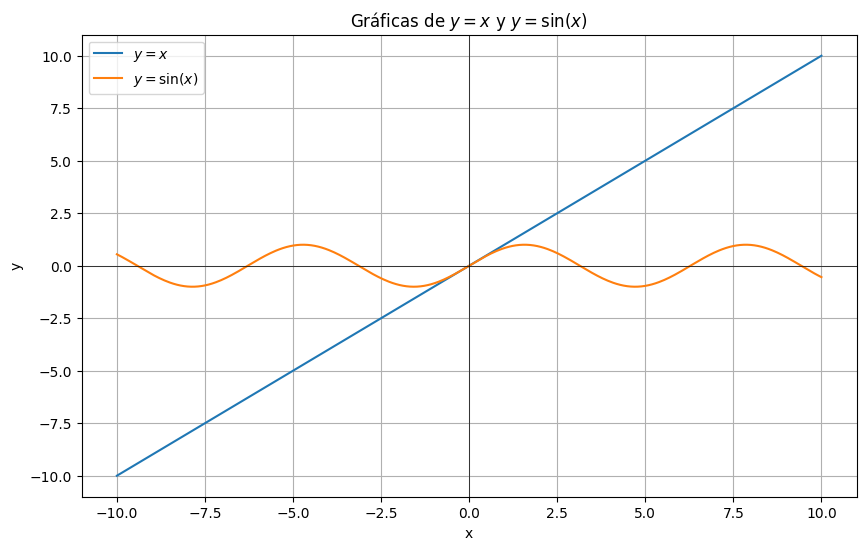

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las funciones
def equation1(x):
    return x

def equation2(x):
    return np.sin(x)

# Generar valores de x para la gráfica
x = np.linspace(-10, 10, 400)

# Graficar y = x y y = sin(x)
plt.figure(figsize=(10, 6))
plt.plot(x, equation1(x), label='$y=x$')
plt.plot(x, equation2(x), label='$y=\sin(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráficas de $y=x$ y $y=\sin(x)$')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True, which='both')
plt.legend()
plt.show()


In [2]:
from typing import Callable

# Definir la función f(x) = x - 2*sin(x)
def f(x):
    return x - 2 * np.sin(x)

# Función sign
def sign(x: float) -> int:
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

# Función de bisección
def bisection(a: float, b: float, *, equation: Callable[[float], float], tol: float, N: int) -> tuple[float, float, float, int] | None:
    i = 1

    # Validación de entrada
    assert a < b, "a no es menor que b, el intervalo no es válido."
    assert equation(a) * equation(b) < 0, "La función no cambia de signo en el intervalo."

    Fa = equation(a)
    p = a  # para evitar error en i == 0.
    for i in range(N):
        p = a + (b - a) / 2
        FP = equation(p)
        if FP == 0 or (b - a) / 2 < tol:
            return p, a, b, i

        if sign(Fa) * sign(FP) > 0:
            a = p
            Fa = FP
        else:
            b = p

    # Respuesta temporal
    return p, a, b, i

# Elegir un intervalo adecuado basado en la gráfica
a = 1
b = 2  # Intervalo donde la función cambia de signo basado en la gráfica
tol = 1e-5
N = 1000  # Número máximo de iteraciones

# Encontrar la raíz usando la función de bisección
root, a_final, b_final, iterations = bisection(a, b, equation=f, tol=tol, N=N)
print(f"La raíz encontrada es x = {root} con una tolerancia de {tol} después de {iterations} iteraciones")


La raíz encontrada es x = 1.8955001831054688 con una tolerancia de 1e-05 después de 16 iteraciones
